In [1]:
from maelzel.core import *

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


In [2]:
n = Note(60, dur=10)
n.play(instr='piano')



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


getPfields: numchans =  2


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset.piano:1001.0002, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=0.5 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)

In [2]:
scale = Chain([Note(n) for n in "4C 4D 4E 4F 4G".split()])
play.getPlaySession().defInstr('reverb', r'''
|kfeedback=0.6|
amon1, amon2 monitor
a1, a2 reverbsc amon1, amon2, kfeedback, 12000, sr, 0.6
outch 1, a1-amon1, 2, a2-amon2
''')
with play.OfflineRenderer() as r:
    # r.sched('reverb')
    scale.play('piano')



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:
INFO:maelzel.core:Rendering to /home/em/.local/share/maelzel/recordings/rec-2022-03-11T07:33:19.625.wav


----------- 1
getPfields: numchans =  2
:::: piano preset.piano
----------- 1
getPfields: numchans =  2
:::: piano preset.piano
----------- 1
getPfields: numchans =  2
:::: piano preset.piano
----------- 1
getPfields: numchans =  2
:::: piano preset.piano
----------- 1
getPfields: numchans =  2
:::: piano preset.piano


UnifiedCSD:  /tmp/tmpvf7kln5_.csd
unknown CSD tag: </CsoundSynthesizer
instr _automatePargViaTable uses instrument number 1
instr _automateTableViaTable uses instrument number 2
instr _pwrite uses instrument number 3
Elapsed time at end of orchestra compile: real: 0.007s, CPU: 0.007s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.008s, CPU: 0.008s
--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
graphics suppressed, ascii substituted
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 2048-byte blks of floats to /home/em/.local/share/maelzel/recordings/rec-2022-03-11T07:33:19.625.wav (WAV)
SECTION 1:
new alloc for instr 100:
B  0.000 ..  1.000 T  1.000 TT  1.000 M:  0.29046  0.28471
new alloc for instr 100:
B  1.000 ..  2.000 T  2.000 TT  2.000 M:  0.29179  0.30370
B  2.000 ..  3.000 T  3.000 TT  3.000 M

In [3]:
r.writeCsd("/home/em/tmp/piano2.csd")

'/home/em/tmp/piano2.csd'

In [5]:
r.renderer.writeCsd("/home/em/tmp/piano.csd")

In [7]:
r.renderer.csd.

In [1]:
# Inside jupyter
from csoundengine import *
s = Engine().session()
s.defInstr('vco', r'''
  |kmidinote, kampdb=-12, kcutoff=3000, kres=0.9|
  kfreq = mtof:k(kmidinote)
  asig = vco2:a(ampdb(kampdb), kfreq)
  asig = moogladder2(asig, lag(kcutoff, 0.1), lag(kres, 0.1))
  asig *= linsegr:a(0, 0.1, 1, 0.1, 0)
  outs asig, asig
''')
synth = s.sched('vco', kmidinote=67)
# Specify the ranges for some sliders. All named parameters
# are assigned a widget
synth.ui(kampdb=(-48, 0), kres=(0, 1))

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
Jac

Button(description='Stop', style=ButtonStyle())

FloatSlider(value=67.0, description='kmidinote', layout=Layout(width='80%'), max=127.0, readout_format='.1f')

FloatSlider(value=-12.0, description='kampdb', layout=Layout(width='80%'), max=0.0, min=-48.0, step=0.05)

FloatSlider(value=3000.0, description='kcutoff', layout=Layout(width='80%'), max=12000.0, readout_format='d', …

FloatSlider(value=0.9, description='kres', layout=Layout(width='80%'), max=1.0, readout_format='.3f', step=0.0…

In [4]:
print(config.generateRstDocumentation())

sr:
    | Default: **0**  -- `int`
    | Choices: ``0, 22050, 44100, 48000, 88200, 96000``
    | *samplerate - 0=default sr for the backend*

rec_sr:
    | Default: **44100**  -- `int`
    | Choices: ``44100, 48000, 88200, 96000, 192000``
    | *default samplerate when rendering*

nchnls:
    | Default: **0**  -- `int`
    | Between 0 - 128
    | *Number of output channels. 0=default for used device*

nchnls_i:
    | Default: **0**  -- `int`
    | Between 0 - 128
    | *Number of input channels to use. 0 = default for used device*

ksmps:
    | Default: **64**  -- `int`
    | Choices: ``16, 32, 64, 128, 256``
    | *corresponds to csound's ksmps*

rec_ksmps:
    | Default: **64**  -- `int`
    | Choices: ``16, 32, 64, 128, 256``
    | *samples per cycle when rendering*

rec_sample_format:
    | Default: **float**  -- `(int, str)`
    | Choices: ``16, 24, 32, float``
    | *Sample format used when rendering*

rec_suppress_output:
    | Default: **False**  -- `bool`
    | *Supress debugg

In [2]:
from csoundengine import *
session = Engine().session()
session.defInstr('sine', r'''
    {kamp=0.1, kfreq=1000}
    outch 1, oscili:a(kamp, kfreq)
''')
synth = session.sched('sine', tabargs={'kfreq': 440})
synth.set('kfreq', 2000, delay=3)


Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Asked for backend sr, but backend pa_cb, does nothave a fixed sr. Using sr=44100


rtaudio: PortAudio module enabled ...
using callback interface
--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 65536-byte blks of shorts from adc1 (RAW)
PortAudio V19.6.0-devel, revision 396fe4b6699ae929d3a685b3ef8a7e97396139a4
   0: adc0 (pulse [ALSA, 32 in, 32 out])
   1: adc1 (default [ALSA, 32 in, 32 out])
   2: adc2 (/dev/dsp [OSS, 16 in, 16 out])
PortAudio: selected input device 'default'
   

In [12]:
print(csoundlib.instrParseBody(instr))

ParsedInstrBody(pfieldsIndexToName={4: 'ibus', 5: 'kfreq'}, pfieldsText='ibus = p4\nkfreq = p5', body='\na0 = busin(ibus)\na1 = oscili:a(0.5, kfreq) * a0\noutch 1, a1', pfieldsDefaults={1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 1000.0}, pfieldsUsed={4, 5}, outChannels={1}, pfieldsNameToIndex={'ibus': 4, 'kfreq': 5})


In [3]:
orc = r"""
sr = 44100
ksmps = 32
nchnls = 2
0dbfs = 1

seed 0

opcode AddSynth,a,i[]i[]iooo
 iFqs[], iAmps[], iBasFreq, iPtlIndx, iFreqDev, iAmpDev xin
 iFreq = iBasFreq * iFqs[iPtlIndx] * cent(rnd31:i(iFreqDev,0))
 iAmp = iAmps[iPtlIndx] * ampdb(rnd31:i(iAmpDev,0))
 aPartial poscil iAmp, iFreq
 if iPtlIndx < lenarray(iFqs)-1 then
  aPartial += AddSynth(iFqs,iAmps,iBasFreq,iPtlIndx+1,iFreqDev,iAmpDev)
 endif
 xout aPartial
endop

;frequency and amplitude multipliers for 11 partials of Risset's bell
giFqs[] fillarray  .56, .563, .92, .923, 1.19, 1.7, 2, 2.74, 3, 3.74, 4.07
giAmps[] fillarray 1, 2/3, 1, 1.8, 8/3, 5/3, 1.46, 4/3, 4/3, 1, 4/3

instr Risset_Bell
 ibasfreq = p4
 iamp = ampdb(p5)
 ifqdev = p6 ;maximum freq deviation in cents
 iampdev = p7 ;maximum amp deviation in dB
 aRisset AddSynth giFqs, giAmps, ibasfreq, 0, ifqdev, iampdev
 aRisset *= transeg:a(0, .01, 0, iamp/10, p3-.01, -10, 0)
 out aRisset, aRisset
endin
"""
csoundlib.parseOrc(orc)

[ParsedBlock(kind='header', text='sr = 44100', startLine=1, endLine=1, name='sr', attrs={'value': '44100'}),
 ParsedBlock(kind='header', text='ksmps = 32', startLine=2, endLine=2, name='ksmps', attrs={'value': '32'}),
 ParsedBlock(kind='header', text='nchnls = 2', startLine=3, endLine=3, name='nchnls', attrs={'value': '2'}),
 ParsedBlock(kind='header', text='0dbfs = 1', startLine=4, endLine=4, name='0dbfs', attrs={'value': '1'}),
 ParsedBlock(kind='instr0', text='seed 0', startLine=6, endLine=6, name='', attrs=None),
 ParsedBlock(kind='opcode', text='opcode AddSynth,a,i[]i[]iooo\n iFqs[], iAmps[], iBasFreq, iPtlIndx, iFreqDev, iAmpDev xin\n iFreq = iBasFreq * iFqs[iPtlIndx] * cent(rnd31:i(iFreqDev,0))\n iAmp = iAmps[iPtlIndx] * ampdb(rnd31:i(iAmpDev,0))\n aPartial poscil iAmp, iFreq\n if iPtlIndx < lenarray(iFqs)-1 then\n  aPartial += AddSynth(iFqs,iAmps,iBasFreq,iPtlIndx+1,iFreqDev,iAmpDev)\n endif\n xout aPartial\nendop', startLine=8, endLine=17, name='AddSynth', attrs={'outargs': 'a

In [1]:
from csoundengine import *

e = Engine()
s = e.session()

s.defInstr('sender', r'''
ibus = p5
asig vco2 0.1, 1000
busout(ibus, asig)
''')

s.defInstr('receiver', r'''
ibus = p5
kgain = p6
asig = busin:a(ibus)
asig *= a(kgain)
outch 1, asig
''')


bus = s.assignBus()

chain = [s.sched('sender', ibus=bus),
         s.sched('receiver', ibus=bus, kgain=0.5)]


Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
ALSA lib pcm_dsnoop.c:638:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1075:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot conne

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr




rtaudio: PortAudio module enabled ...
using callback interface
--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 1024 sample-frame blocks
reading 65536-byte blks of shorts from adc1 (RAW)
ALSA lib pcm_dsnoop.c:638:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1075:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2660:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done

In [7]:
chain[1].setp(kgain=0.7)

In [4]:
config.edit()

kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found


**Notify** Config Edit: csoundengine:engine: Modify the values as needed. Save the file to accept the changes or press ctrl-c at the python prompt to cancel
**Notify** Config Edit: csoundengine:engine: Editing aborted


In [2]:
sample = e.readSoundfile("/home/em/Lib/snd/samples/speech/colours-german-male.flac")

/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


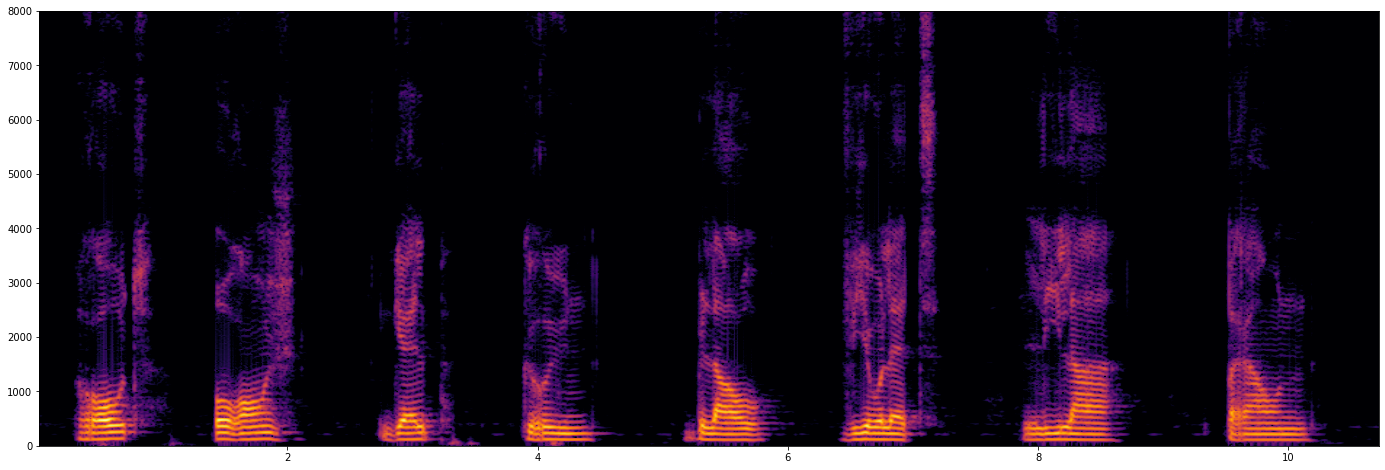

In [3]:
e.plotTableSpectrogram(sample, mindb=-100, maxfreq=8000, fftsize=2048)

In [3]:
%matplotlib qt5

/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/em/.virtualenvs/em9/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


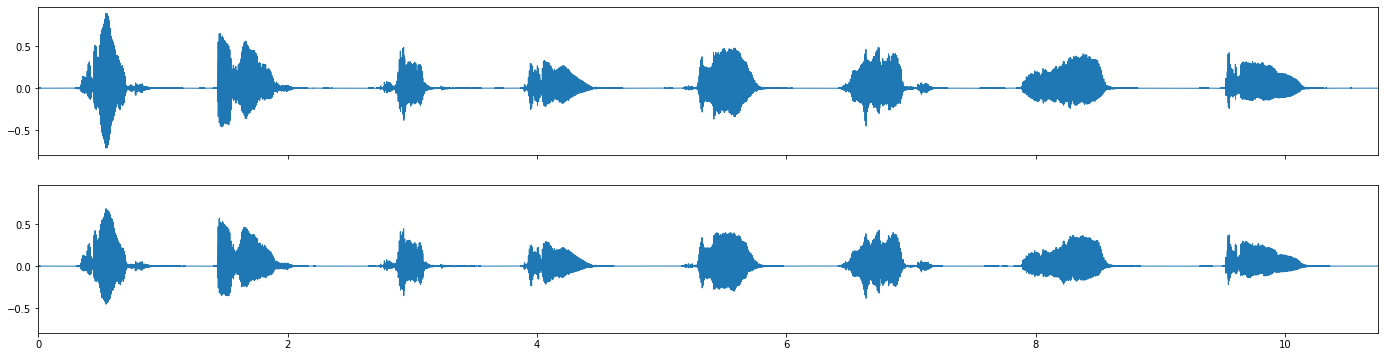

In [3]:
e.plotTable(sample)

In [4]:
config.edit()

kf.service.services: KApplicationTrader: mimeType "x-scheme-handler/file" not found


**Notify** Config Edit: csoundengine:engine: Modify the values as needed. Save the file to accept the changes or press ctrl-c at the python prompt to cancel
**Notify** Config Edit: csoundengine:engine: Editing aborted


 *** rtjack: connection to JACK server was lost, reconnecting...Server is not running
Cannot read socket fd = 63 err = Success
CheckRes error
JackSocketClientChannel read fail
Cannot read socket fd = 72 err = Success
CheckRes error
JackSocketClientChannel read fail
Cannot read socket fd = 76 err = Success
CheckRes error
JackSocketClientChannel read fail
Server is not running
Jack server was closed but clients are still allocated, cleanup...
Cleanup client ref = 6
Server is not running
Cleanup client ref = 7
Server is not running
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
 *** rtjack: could not connect to JACK serverend of score.		   overall amps:  0.00000  0.00000  0.00000  0.00000
	   overall samples out of range:  

In [4]:
e.restart()

end of score.		   overall amps:  0.44694  0.34305  0.00000  0.00000
	   overall samples out of range:        0        0        0        0
0 errors in performance
1288 1024 sample blks of 64-bit floats written to dac:system:playback
Restarting ◢                                                                   


--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 1024 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


In [6]:
e.setp(ev, 5, 1)

In [7]:
e.unschedAll()

end of section 1	 sect peak amps:  0.00000  0.00000  0.00000  0.00000
SECTION 1:


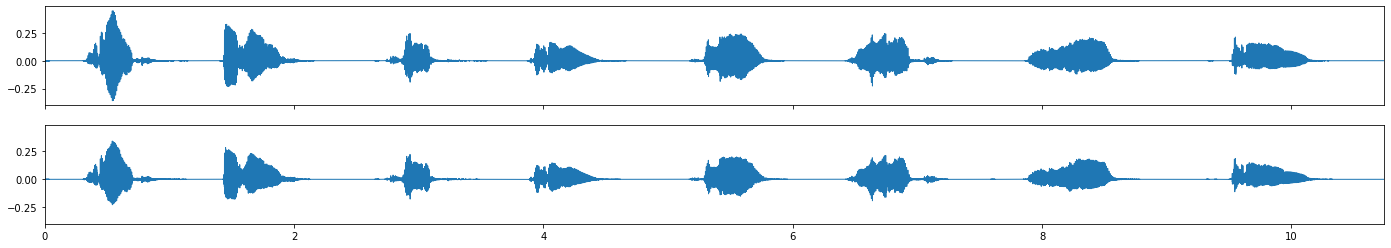

In [15]:
e.plotTable(source)

In [16]:
e

Engine(name=engine0, sr=48000, backend=jack, outdev=dac:system:playback, nchnls=4, indev=adc:system:capture, nchnls_i=2, bufferSize=256)

In [6]:
d = e.getTableData(source)
d.shape

(947516,)

In [7]:
i = e.tableInfo(source)
i

TableInfo(sr=44100, size=947516, numChannels=2, numFrames=473758, path='', hasGuard=False)

In [6]:
e.lockClock()
for i, midi in enumerate([60, 60.5, 61.5]):
    session.sched("synth", delay=i, dur=4, kamp=0.1, kmidi=midi)
e.lockClock(False)

kamp: 0.100000, kmidi: 60.000000
kamp: 0.100000, kmidi: 60.500000
kamp: 0.100000, kmidi: 60.000000
kamp: 0.100000, kmidi: 61.500000
kamp: 0.100000, kmidi: 60.000000
kamp: 0.100000, kmidi: 60.500000
kamp: 0.100000, kmidi: 60.000000
kamp: 0.100000, kmidi: 60.500000
kamp: 0.100000, kmidi: 61.500000
kamp: 0.100000, kmidi: 60.500000
kamp: 0.100000, kmidi: 61.500000
kamp: 0.100000, kmidi: 61.500000


In [5]:
e.unsched(eventid)

In [18]:
engine.elapsedTime()

20.1621768707483

In [3]:
# Define an instrument
engine.compile('''
  instr synth
    ; pfields of the instrument
    kmidinote = p4
    kamp = p5
    kcutoff = p6
    kdetune = p7

    kfreq = mtof:k(kmidinote)
    ; A filtered sawtooth
    asig  = vco2:a(kamp*0.7, kfreq)
    asig += vco2:a(kamp*0.7, kfreq + kdetune)
    asig = moogladder2(asig, kcutoff, 0.9)
    ; Attack / Release
    aenv = linsegr:a(0, 0.01, 1, 0.2, 0)
    asig *= aenv
    outs asig, asig
  endin
''')



In [4]:
# Start a synth with indefinite duration. This returns the eventid (p1)
# of the running instrument, which can be used to further control it
event = engine.sched("synth", args=[48, 0.2, 3000, 4])



sched delay:  2.596281179138322


In [5]:
engine.setp(event, 4, 60)

sched delay:  4.076553287981859


In [6]:
engine.unsched(event)

In [ ]:
# Change midinote. setp means: set p-field. This sets p4 (kmidinote) to 50
engine.setp(event, 4, 50)

# Modify cutoff (p6)
engine.setp(event, 6, 1000, delay=4)

# Stop the synth
engine.unsched(event)

In [2]:
e = ce.Engine(numAudioBuses=100, numControlBuses=100, backend='jack', buffersize=256, quiet=True)



--Csound version 6.17 (double samples) Feb 25 2022
[commit: f5b4258794a82c99f7d85f1807c6638f2e80ccac]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 1024 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


In [3]:
e.testAudio()


Testaudio: pink noise mode
Channel: 0


522.0002

Channel: 1
Channel: 2
Channel: 3


In [5]:
e.stop()

inactive allocs returned to freespace
end of score.		   overall amps:  0.76642  0.77667  0.72256  0.68677
	   overall samples out of range:        0        0        0        0
0 errors in performance
3520 1024 sample blks of 64-bit floats written to dac:system:playback


In [4]:
e.compile(r'''
instr 10
  ibus = p4
  kfreq = p5
  asig vco2 0.1, kfreq2
  busout(ibus, asig)
endin
''')

e.compile(r'''
instr 20
  ibus = p4
  asig = busin(ibus)
  ; do something with asig
  asig *= 0.5
  outch 1, asig
endin
''')


error:  Variable 'kfreq2' used before defined
Line 5

error:  Variable type for kfreq2 could not be determined.

Parsing failed due to syntax errors
Stopping on parser failure
compileOrc error: 
001  
002  instr 10
003    ibus = p4
004    kfreq = p5
005    asig vco2 0.1, kfreq2
006    busout(ibus, asig)
007  endin


CsoundError: Could not compile code

In [ ]:
busnum = e.assignBus()
s1 = e.sched(10, 0, 4, (busnum,))
s2 = e.sched(20, 0, 4, (busnum,))